Text(0, 0.5, 'Log of Wealth, $\\ln(W)$')

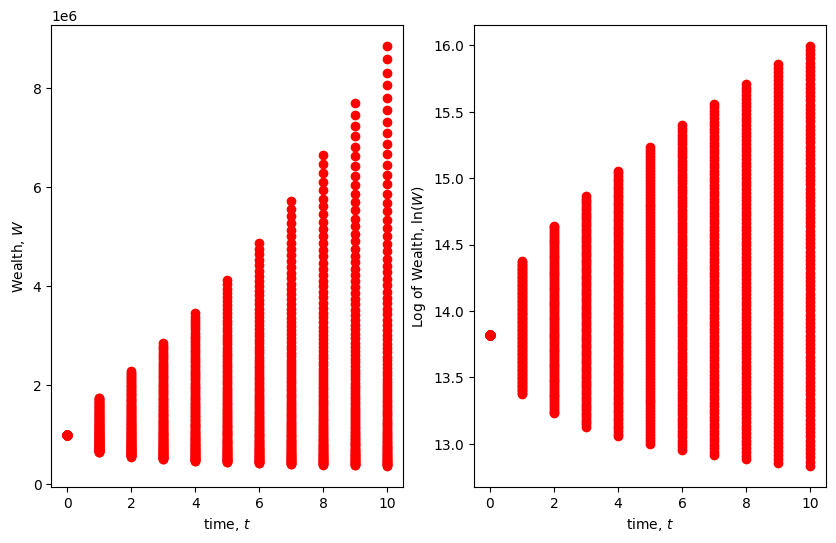

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, exp
 
W0 = 1000000
T = 10
nW = 101
mu_stock = 0.08
mu_bond = 0.045
sig_stock = 0.20
sig_bond = 0.0
 
lnW = np.zeros((nW,T+1))
W = np.zeros((nW, T+1))
 
for t in range(T+1):
    lnW_min = log(W0) + (mu_stock-0.5*sig_stock**2)*t - 2.5*sig_stock*sqrt(t)
    lnW_max = log(W0) + (mu_stock-0.5*sig_stock**2)*t + 2.5*sig_stock*sqrt(t)
    lnW[:,t] = np.linspace(lnW_min, lnW_max, nW)
W = np.exp(lnW)
 
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)    
for t in range(T+1):
    plt.scatter(t*np.ones(nW), W[:,t], color='r')
plt.xlabel("time, $t$")
plt.ylabel("Wealth, $W$")
plt.subplot(1, 2, 2)
for t in range(T+1):
    plt.scatter(t*np.ones(nW), lnW[:,t], color='r')
plt.xlabel("time, $t$")
plt.ylabel("Log of Wealth, $\ln(W)$")